This notebook investigates the properties of constraint propagation algorithms, namely PC-1 (enforcing path consistency).

In [1]:
from exact_solver import solve, solve_stp
from problem_generator import generate_problem 
from preprocessing import PC_1

from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

In [2]:
from problem_sets import SIMPLE, BINARY

In [12]:
# syntax for overriding a value.
_ = generate_problem(**{ **SIMPLE, 'variables': 15 } )

Let's find out, given UNSAT problems, if it deduces it right.

In [25]:
# First we need to create a dataset of interesting unsatisfiable problems.
# Let's say, 50 BINARY problems in the interesting region.

num_tests = 50

Ts_unsat = []
while len(Ts_unsat) < num_tests:
    print(len(Ts_unsat), end=', ')
    T = generate_problem(**{ **BINARY, 'scaling_factor': 0.5} )
    if not solve(T, backjump=False):
        Ts_unsat.append( T )
print('Done')

0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 14, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 26, 27, 28, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 

In [26]:
num_deduced = 0
for T in Ts_unsat:
    sol = PC_1(T)
    if sol is None: num_deduced += 1

print(num_deduced / num_tests)

1.0


What if constraint probability is varied?

In [67]:
# what we will do is try to generate num_tests problems for each constraint probability
# if it fails to generate unsat problems just move on
num_tests = 30

probs = []
T_list = []

for prob in range(30, 101, 5):
    tests = []
    for k in range(num_tests):
        print(k, end=' ')
        # it seems in order for the problems to be interesting for this graph,
        # we need to have unsat problem, but that have ok sized intervals
        
        T = generate_problem(**{ **BINARY, 'constraint_probability': prob/100, 'scaling_factor': 0.1} )
        if not solve(T, backjump=True):
            tests.append( T )
        
    probs.append(prob)
    T_list.append(tests)
    print(prob, end=', ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30, 0 1 2 3 

KeyboardInterrupt: 

30 24 24


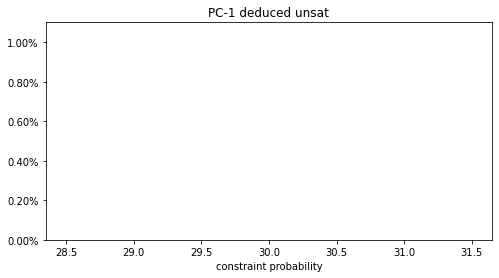

In [68]:
fig, ax = plt.subplots(1, figsize=(8, 4))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('constraint probability')
ax.set_title('PC-1 deduced unsat')
ax.set_ylim(0, 1.1)

graph_deduceds = []
for p, Ts in zip(probs, T_list):
    print(p, len(Ts), end=' ')
    if len(Ts) == 0:
        graph_deduceds.append(0) # TODO deal with this case
        continue
    
    num_deduced = 0
    for T in Ts:
        sol = PC_1(T)
        if sol is None: num_deduced += 1
    print(num_deduced)
    graph_deduceds.append( num_deduced / len(Ts) )
    
ax.plot(probs, graph_deduceds)